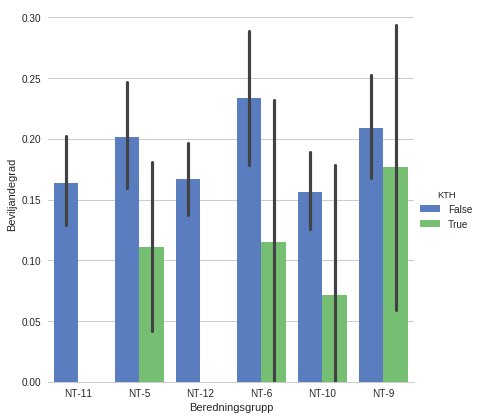

In [46]:
%matplotlib inline
import numpy as np
import pandas as pd

# Parse the excel spreadsheet
def read_ansok():
    df = pd.read_excel('NT2008-2016_anon.xlsx', sheetname='Lista', encoding = 'utf8')
    df = df.drop(['Dnr','Bidragsform',u'ÄmnesområdeRED','Inriktning',u'AntalBevÅr'], 1)
    df = df.rename(columns={u'Medelsförvaltare TABELL': 'Institut', u'HuvudBG': 'Beredningsgrupp'})
    df = df.assign(Biology = lambda x: (x.SCB1 < 10600.0) | (x.SCB1 >= 10700.0) | \
                   (x.SCB2 < 10600.0) | (x.SCB2 >= 10700.0) | \
                   (x.SCB3 < 10600.0) | (x.SCB3 >= 10700.0))
    df = df.drop(['SCB1','SCB2','SCB3','SCB4','SCB5'], 1)
    df = df.assign(KTH = lambda x: x.Institut == u'Kungliga Tekniska h\xf6gskolan')
    df = df.assign(Beviljad = lambda x: x.Beslut == u'Beviljad')
    return df

df = read_ansok()
rel = df.loc[df['Beredningsgrupp'].isin(['NT-5','NT-6','NT-9','NT-10','NT-11','NT-12'])]
import seaborn as sns
sns.set(style="whitegrid")
g = sns.factorplot(x="Beredningsgrupp", y="Beviljad", hue="KTH", data=rel,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Beviljandegrad")


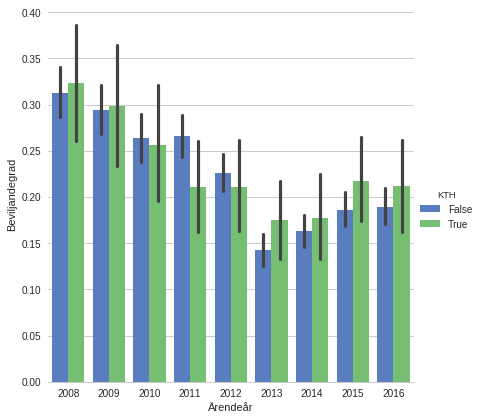

In [48]:
g = sns.factorplot(x=u'Ärendeår', y="Beviljad", hue="KTH", data=df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Beviljandegrad")
